In [41]:
import chardet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [42]:
# Data Collecting Part

wine_data = pd.read_csv("vivino_dataset.csv", encoding=result['encoding'])

wine_data

,Names,color_wine,Prices,ML,Ratings,Ratingsnum,Countrys,ABV %,rates
0,00 Wines VGW Chardonnay 2017,White Wine,79.99$,750,0.0,0,"Chardonnay from Willamette Valley, Oregon",13.0,"JS, WE, WS"
1,00 Wines VGR Pinot Noir 2019,Red Wine,99.99$,750,0.0,0,"Pinot Noir from Willamette Valley, Oregon",12.9,"WE, JS, RP"
2,00 Wines EGW Chardonnay 2019,White Wine,115.99$,750,0.0,0,"Chardonnay from Willamette Valley, Oregon",0.0,"JS, RP, WE"
3,100 Nails Ranch Pinot Noir 2019,Red Wine,16.99$,750,0.0,0,"Pinot Noir from Central Coast, California",14.2,WW
4,100 Nails Ranch Chardonnay 2019,White Wine,16.99$,750,0.0,0,"Chardonnay from Sonoma County, California",14.2,0
...,...,...,...,...,...,...,...,...,...
15249,Vivera Martinella Etna Rosso 2014,Red Wine,40.99$,750,0.0,0,"Other Red Blends from Sicily, Italy",13.5,V
15250,Vivera Etna Rosso 2017,Red Wine,29.99$,750,0.0,0,"Other Red Blends from Sicily, Italy",13.5,0
15251,Vivera Terra dei Sogni Rosso 2017,Red Wine,21.99$,750,0.0,0,"Other Red Blends from Sicily, Italy",14.0,0
15252,Vivera Salisire Etna Bianco 2016,White Wine,33.99$,750,0.0,0,"Carricante from Sicily, Italy",12.0,0


In [62]:
# Data Cleaning Part

def cleaning_data(wine_data):

    # Filling missing Ratings with the median
    wine_data['Ratings'].fillna(wine_data['Ratings'].median(), inplace=True)

    # Convert Prices, ML and ABV % to numerical values
    wine_data['Prices'] = wine_data['Prices'].replace('[\$,]', '', regex=True).astype(float)
    wine_data['ML'] = wine_data['ML'].astype(float)
    wine_data['ABV %'] = wine_data['ABV %'].replace({'0.0': None}).astype(float)

    print(wine_data.describe())
    
cleaning_data(wine_data)

         color_wine        Prices            ML      Ratings    Ratingsnum  \
count  15254.000000  15254.000000  15254.000000  15254.00000  15254.000000   
mean       6.710633    119.061999    779.820441      1.08150     10.103383   
std        1.676028    378.385650    267.972707      1.80233     48.109810   
min        0.000000      4.970000      0.000000      0.00000      0.000000   
25%        6.000000     19.990000    750.000000      0.00000      0.000000   
50%        6.000000     34.990000    750.000000      0.00000      0.000000   
75%        8.000000     79.990000    750.000000      3.40000      5.000000   
max        9.000000  11899.970000   9000.000000      5.00000   1829.000000   

           Countrys         ABV %  
count  15254.000000  15254.000000  
mean    1034.308968      9.372639  
std      672.910288      6.439793  
min        0.000000      0.000000  
25%      366.000000      0.000000  
50%      978.000000     13.000000  
75%     1602.750000     14.000000  
max     2

In [60]:
# Data Exploration Part

def exploration_data(wine_data):
    
    print(f"Dataset shape : {wine_data.shape[0]}, {wine_data.shape[1]}\n")

    print("Firs 10 rows:")
    display(wine_data.head(10))

    print("Describe the data:")
    display(wine_data.describe())
    
exploration_data(wine_data)

Dataset shape : 15254, 9

Firs 10 rows:


,Names,color_wine,Prices,ML,Ratings,Ratingsnum,Countrys,ABV %,rates
0,00 Wines VGW Chardonnay 2017,9,79.99,750.0,0.0,0,491,13.0,"JS, WE, WS"
1,00 Wines VGR Pinot Noir 2019,6,99.99,750.0,0.0,0,1499,12.9,"WE, JS, RP"
2,00 Wines EGW Chardonnay 2019,9,115.99,750.0,0.0,0,491,0.0,"JS, RP, WE"
3,100 Nails Ranch Pinot Noir 2019,6,16.99,750.0,0.0,0,1385,14.2,WW
4,100 Nails Ranch Chardonnay 2019,9,16.99,750.0,0.0,0,464,14.2,0
5,100 Nails Ranch Cabernet Sauvignon 2018,6,19.99,750.0,3.3,9,269,14.2,TP
6,1000 Stories Bourbon Barrel Aged Prospectors' ...,6,19.99,750.0,0.0,0,220,0.0,WW
7,1000 Stories American Barrel Aged Pinot Noir 2020,6,17.99,750.0,0.0,0,1381,14.5,0
8,1000 Stories Bourbon Barrel Aged Zinfandel 2020,6,18.99,750.0,3.8,11,2215,15.5,WW
9,1000 Stories Bourbon Barrel Aged Chardonnay 2019,9,19.99,750.0,4.4,10,357,14.4,TP


Describe the data:


,color_wine,Prices,ML,Ratings,Ratingsnum,Countrys,ABV %
count,15254.000000,15254.000000,15254.000000,15254.00000,15254.000000,15254.000000,15254.000000
mean,6.710633,119.061999,779.820441,1.08150,10.103383,1034.308968,9.372639
std,1.676028,378.385650,267.972707,1.80233,48.109810,672.910288,6.439793
min,0.000000,4.970000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6.000000,19.990000,750.000000,0.00000,0.000000,366.000000,0.000000
50%,6.000000,34.990000,750.000000,0.00000,0.000000,978.000000,13.000000
75%,8.000000,79.990000,750.000000,3.40000,5.000000,1602.750000,14.000000
max,9.000000,11899.970000,9000.000000,5.00000,1829.000000,2241.000000,30.000000


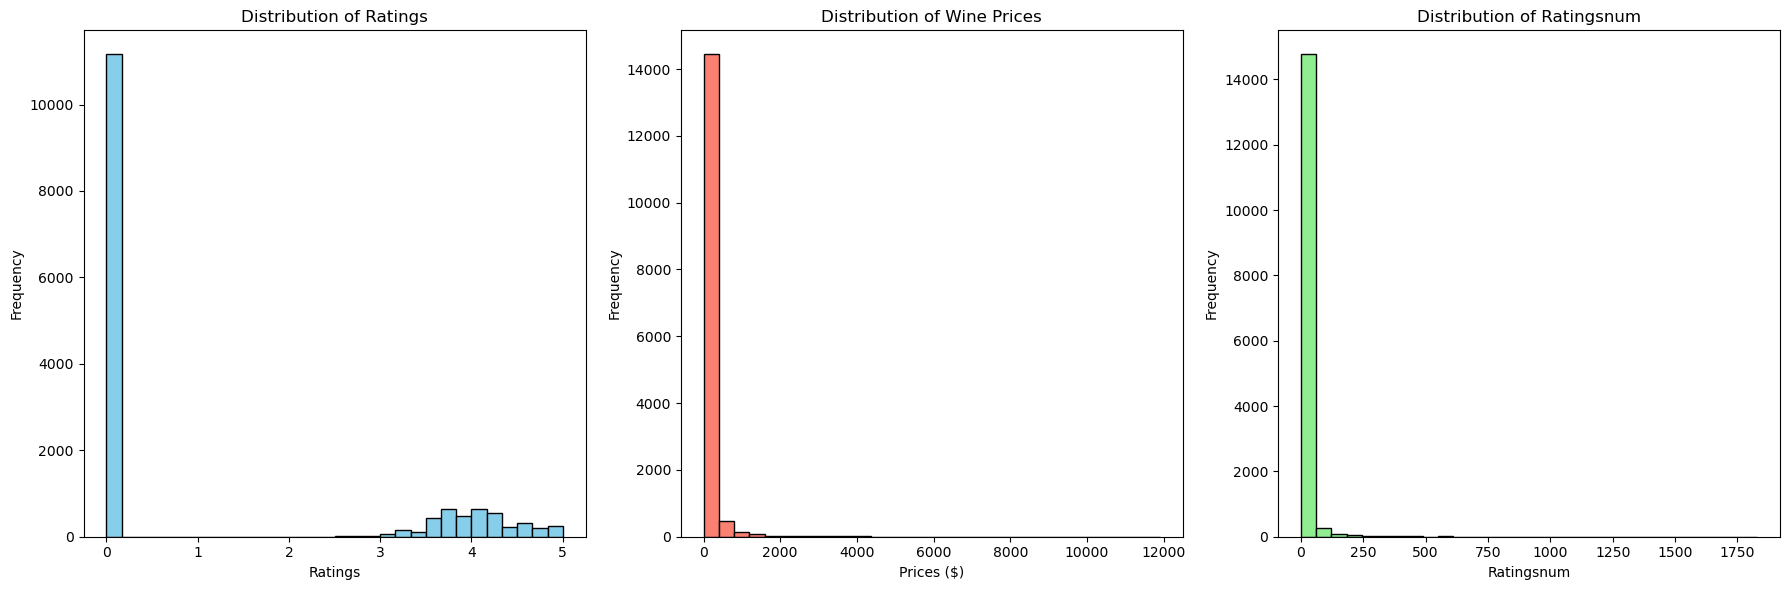

In [58]:
# Data Visualization Part

# Histograms

def histograms(wine_data):
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    # Histogram for Ratings
    axes[0].hist(wine_data['Ratings'], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution of Ratings')
    axes[0].set_xlabel('Ratings')
    axes[0].set_ylabel('Frequency')

    # Histogram for Prices
    axes[1].hist(wine_data['Prices'], bins=30, color='salmon', edgecolor='black')
    axes[1].set_title('Distribution of Wine Prices')
    axes[1].set_xlabel('Prices ($)')
    axes[1].set_ylabel('Frequency')

    # Histogram for Ratingsnum
    axes[2].hist(wine_data['Ratingsnum'], bins=30, color='lightgreen', edgecolor='black')
    axes[2].set_title('Distribution of Ratingsnum')
    axes[2].set_xlabel('Ratingsnum')
    axes[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
histograms(wine_data)

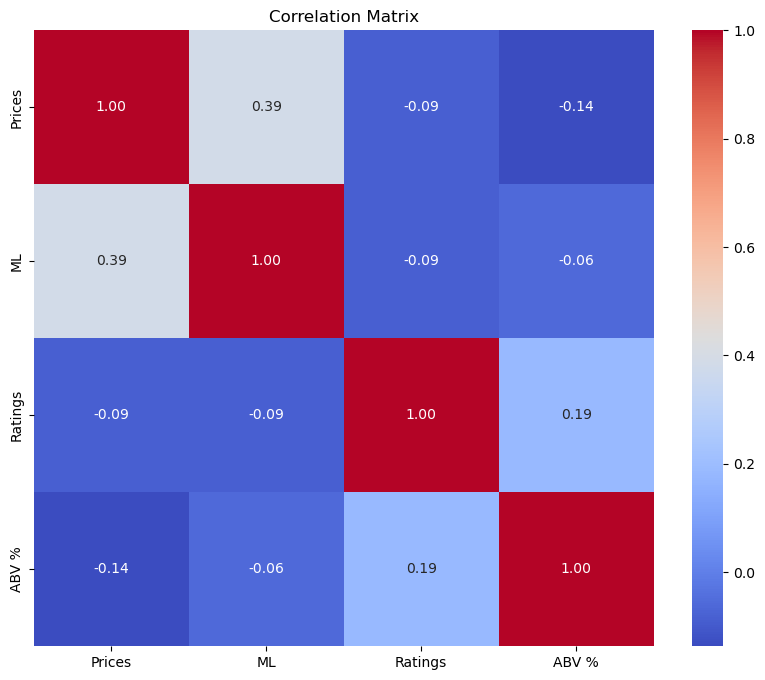

In [56]:
# Correlation Matrix

def correlation_matrix(wine_data):
    
    numeric_columns = wine_data.select_dtypes(include=['float64']).columns
    correlation_matrix = wine_data[numeric_columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
    
correlation_matrix(wine_data)

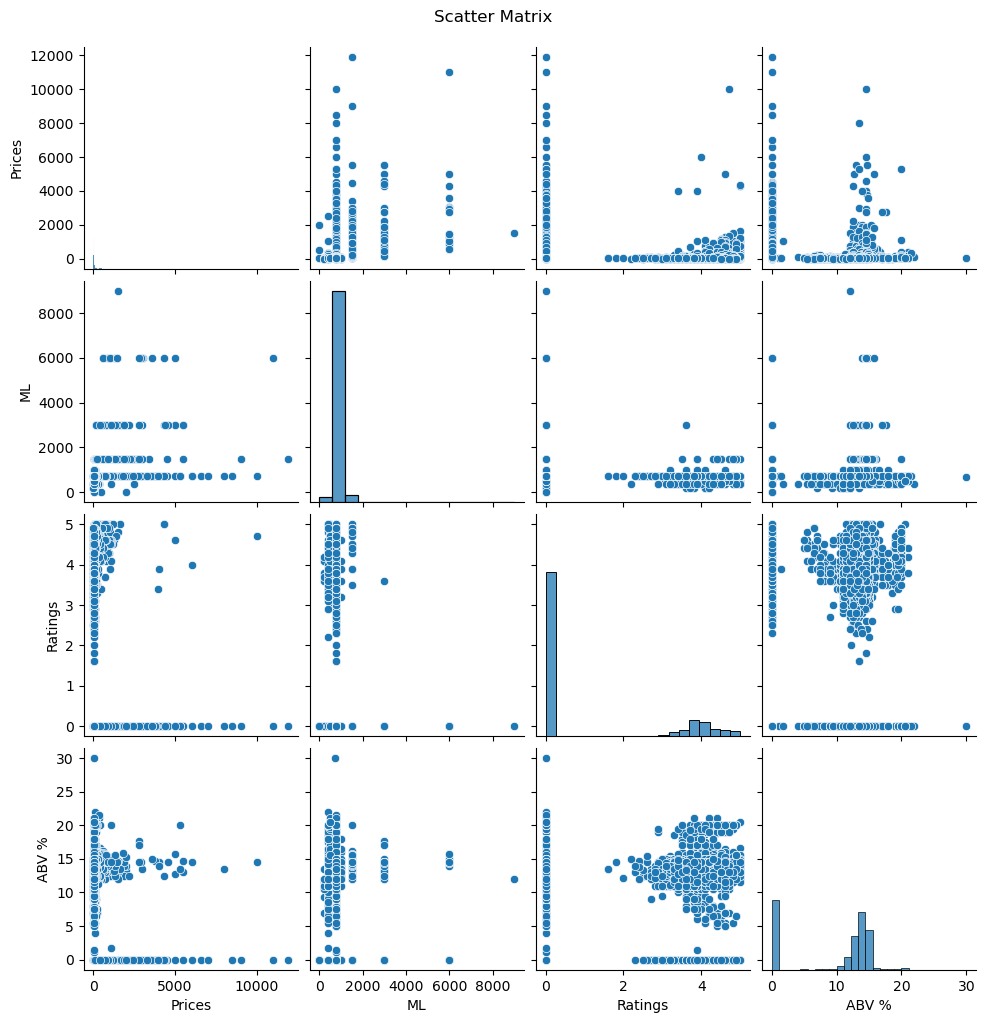

In [55]:
# Scatter Matrix

def scatter_matrix(wine_data):
    
    sns.pairplot(wine_data[['Prices', 'ML', 'Ratings', 'ABV %']])
    plt.suptitle('Scatter Matrix', y=1.02)
    plt.show()
    
scatter_matrix(wine_data)

R-squared score (Linear Regression): 0.18570147236547263
R-squared score (Random Forest Regression): 0.18204495780774288
       Actual Prices  Linear Reg Predictions  Random Forest Predictions
3669           46.99              167.196277                 164.902713
10855          21.99               86.628606                  51.678176
10108          32.99              167.196277                 164.902713
3781          339.99               75.906908                 173.011188
12242          59.99               79.191590                  51.718127
14328          25.99               85.079228                  25.518763
5040           14.99               77.332336                  81.198541
10590          99.99              167.196277                 164.902713
1606           58.99               47.695398                  44.202000
11635          21.99               65.703152                  20.999950
Accurancy score (Linear Regression): 126.13779492139444
Accurancy score (Random Forest 

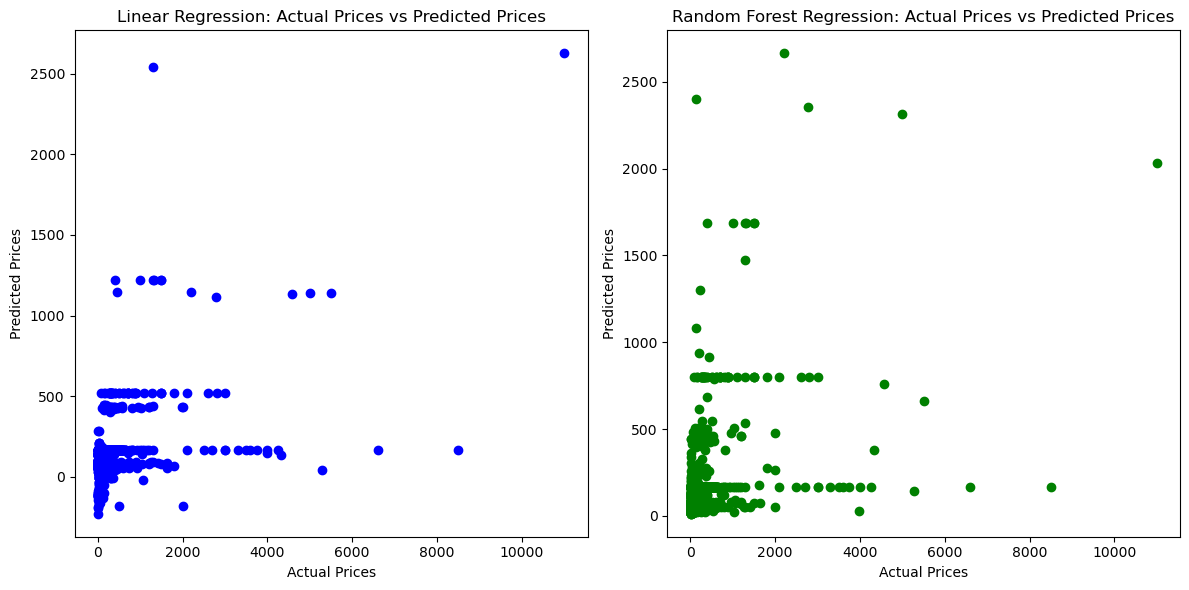

In [63]:
# Machine Learning Part

def predictions_and_evaluations(wine_data):
    
    # Feature selection
    features = ['Ratings', 'Ratingsnum', 'ABV %', 'ML']
    target = 'Prices'

    # Encoding categorical features
    le = LabelEncoder()
    wine_data['color_wine'] = le.fit_transform(wine_data['color_wine'])
    wine_data['Countrys'] = le.fit_transform(wine_data['Countrys'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(wine_data[features], wine_data[target], test_size=0.2, random_state=42)


    # Linear Regression model
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_linear_reg = linear_reg_model.predict(X_test)

    # Evaluate Linear Regression model
    r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
    print(f"R-squared score (Linear Regression): {r2_linear_reg}")


    # Random Forest Regression model
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_random_forest = random_forest_model.predict(X_test)

    # Evaluate Random Forest Regression model
    r2_random_forest = r2_score(y_test, y_pred_random_forest)
    print(f"R-squared score (Random Forest Regression): {r2_random_forest}")


    # Compare predictions with actual prices
    comparison_df = pd.DataFrame({'Actual Prices': y_test, 'Linear Reg Predictions': y_pred_linear_reg, 'Random Forest Predictions': y_pred_random_forest})
    print(comparison_df.head(10))

    # Calculate Accurancy score using MAE for Linear Regression
    mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
    print(f"Accurancy score (Linear Regression): {mae_linear_reg}")

    # Calculate Accurancy score using MAE for Random Forest Regression
    mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
    print(f"Accurancy score (Random Forest Regression): {mae_random_forest}")

    # Plotting predictions vs actual prices
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_linear_reg, color='blue')
    plt.title('Linear Regression: Actual Prices vs Predicted Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_random_forest, color='green')
    plt.title('Random Forest Regression: Actual Prices vs Predicted Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

    plt.tight_layout()
    plt.show()

    
predictions_and_evaluations(wine_data)